### The Main Question<br>
Once you have explored the data, you should answer the main question: what are the characteristics of users who convert (behavioural and demographic)?<br>
In addition, complete the following:<br>
 Conduct exploratory analysis on the provided dataset. State your hypothesis based on the insights from your exploration.<br>
Prepare your data for modelling (i.e., data cleaning and feature engineering).<br>
Build a model to predict the output variable. Hint: you will need to try several models to find the best model for your problem.<br>
Evaluate each model using the evaluation techniques you have learned in class.<br>
Select and optimize your final model.<br>
Explain your model to a business executive. Your explanation should include the following:<br>
Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.<br>
Your approach for building and evaluating the model. <br>
The final model you selected and how you know this is the best model for the problem.<br>
How the model should be used by the business, in business process.<br>

# Final Exam : 

**submitted by Sreekanth Potlabathini(220088993)**

-------------------------------------------------------------------

In [659]:
# importing all ther required libraries for building a model and validation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc,precision_score,recall_score
import warnings

In [660]:
# importing the dataframe for final exam
df = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\conversion_data.csv")

Conduct exploratory analysis on the provided dataset. State your hypothesis based on the insights from your exploration.

In [661]:
df.sample(5)

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
657,657,658,North America,organic,F,1,1,0,3,0,...,24,39,59,37,2,3,2,3,4,0
77,77,78,Europe,facebook,F,4,0,0,3,5,...,48,36,45,22,3,6,5,6,7,0
1853,1853,1854,South America,google,F,1,5,2,2,1,...,39,34,44,30,6,2,4,6,6,0
199,199,200,Australia,youtube,F,2,4,0,5,0,...,33,60,28,45,1,4,2,2,6,0
372,372,373,Europe,facebook,M,4,2,1,0,7,...,21,22,48,35,1,3,7,7,1,0


In [662]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

In [663]:
df.drop(columns=['Unnamed: 0', 'visitor_id'], inplace=True)

renaming columns

In [664]:
df.columns = ['loc', 'chl','gender', 'views_Mon', 'views_Tue', 'views_Wed','views_Thu', 'views_Fri', 'rat_Mon','rat_Tue', 'rat_Wed', 
              'rat_Thu', 'rat_Fri','p_Mon', 'p_Tue', 'p_Wed', 'p_Thu','p_Fri', 'tos_Mon', 'tos_Tue',
       'tos_Wed', 'tos_Thu', 'tos_Fri','p_v_Mon', 'p_v_Tue', 'p_v_Wed','p_v_Thu', 'p_v_Fri', 'converted']

In [665]:
df.columns

Index(['loc', 'chl', 'gender', 'views_Mon', 'views_Tue', 'views_Wed',
       'views_Thu', 'views_Fri', 'rat_Mon', 'rat_Tue', 'rat_Wed', 'rat_Thu',
       'rat_Fri', 'p_Mon', 'p_Tue', 'p_Wed', 'p_Thu', 'p_Fri', 'tos_Mon',
       'tos_Tue', 'tos_Wed', 'tos_Thu', 'tos_Fri', 'p_v_Mon', 'p_v_Tue',
       'p_v_Wed', 'p_v_Thu', 'p_v_Fri', 'converted'],
      dtype='object')

In [666]:
df.nunique()

loc             5
chl             5
gender          2
views_Mon       6
views_Tue       6
views_Wed      10
views_Thu      13
views_Fri      12
rat_Mon       397
rat_Tue       397
rat_Wed       397
rat_Thu       399
rat_Fri       398
p_Mon        1739
p_Tue        1782
p_Wed        1785
p_Thu        1785
p_Fri        1761
tos_Mon        41
tos_Tue        41
tos_Wed        41
tos_Thu        41
tos_Fri        41
p_v_Mon         7
p_v_Tue         7
p_v_Wed         7
p_v_Thu         7
p_v_Fri         7
converted       2
dtype: int64

In [667]:
df.head(5)

,loc,chl,gender,views_Mon,views_Tue,views_Wed,views_Thu,views_Fri,rat_Mon,rat_Tue,...,tos_Tue,tos_Wed,tos_Thu,tos_Fri,p_v_Mon,p_v_Tue,p_v_Wed,p_v_Thu,p_v_Fri,converted
0,North America,youtube,M,4,5,2,1,2,3.90,2.19,...,33,23,46,57,4,5,5,4,6,1
1,South America,organic,F,2,5,0,1,5,1.31,2.16,...,28,39,24,51,5,6,7,6,2,0
2,Australia,instagram,M,3,4,0,-3,5,3.26,4.79,...,34,22,34,31,1,3,3,2,3,1
3,North America,facebook,M,1,0,0,5,0,2.66,4.79,...,26,43,22,39,3,4,7,7,1,0
4,Asia,instagram,F,1,5,2,2,3,2.76,2.38,...,54,30,47,57,6,6,5,2,4,1


In [668]:
df.sample(5)

,loc,chl,gender,views_Mon,views_Tue,views_Wed,views_Thu,views_Fri,rat_Mon,rat_Tue,...,tos_Tue,tos_Wed,tos_Thu,tos_Fri,p_v_Mon,p_v_Tue,p_v_Wed,p_v_Thu,p_v_Fri,converted
818,South America,facebook,M,1,0,5,5,-3,3.51,2.47,...,42,22,38,48,2,3,2,4,5,1
1914,Europe,instagram,M,4,1,5,2,4,1.43,2.28,...,26,39,52,20,2,3,1,7,2,0
128,Australia,youtube,M,4,2,5,0,0,1.39,1.77,...,59,22,56,28,2,4,2,7,6,0
561,Australia,organic,F,3,5,1,5,5,1.04,1.37,...,34,33,57,38,2,6,3,3,6,1
917,Asia,organic,F,1,3,3,4,5,1.05,4.60,...,29,20,39,37,3,1,3,4,6,1


In [669]:
df.tail(5)

,loc,chl,gender,views_Mon,views_Tue,views_Wed,views_Thu,views_Fri,rat_Mon,rat_Tue,...,tos_Tue,tos_Wed,tos_Thu,tos_Fri,p_v_Mon,p_v_Tue,p_v_Wed,p_v_Thu,p_v_Fri,converted
1995,Europe,organic,F,3,0,0,4,2,4.80,3.98,...,22,51,44,29,5,1,5,7,7,0
1996,South America,google,M,1,2,0,4,1,1.34,1.26,...,54,33,59,38,1,6,6,7,6,0
1997,Asia,facebook,M,2,3,0,0,8,2.56,4.18,...,32,30,48,38,2,1,7,6,4,0
1998,South America,youtube,F,2,2,2,5,5,4.49,3.00,...,21,51,41,56,6,4,2,2,3,1
1999,North America,instagram,F,2,1,1,5,1,3.95,1.45,...,21,45,59,21,4,5,7,3,1,1


In [670]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loc,2000,5,South America,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chl,2000,5,instagram,431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2000,2,F,1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_Mon,2000.0,NaN,NaN,NaN,2.5415,1.704914,0.0,1.0,3.0,4.0,5.0
views_Tue,2000.0,NaN,NaN,NaN,2.4405,1.715206,0.0,1.0,2.0,4.0,5.0
views_Wed,2000.0,NaN,NaN,NaN,2.441,2.343345,0.0,0.0,2.0,4.0,9.0
views_Thu,2000.0,NaN,NaN,NaN,2.2565,2.370974,-4.0,0.0,2.0,5.0,8.0
views_Fri,2000.0,NaN,NaN,NaN,2.354,2.335682,-3.0,0.0,2.0,5.0,8.0
rat_Mon,2000.0,NaN,NaN,NaN,3.02399,1.151037,1.0,2.0175,3.055,4.0225,5.0
rat_Tue,2000.0,NaN,NaN,NaN,3.04276,1.154019,1.0,2.0575,3.08,4.03,5.0


from the above : all have medium hence they are all integers but need to check if the continuous or categorical<br>
location channel and gender are categorical variable. <br>
<br>
gender can be a binary that needs to be mapped.<br>
 most of the data is normally distributed with mean and median very similar.<br>
 count of all values is 2000 that means there is no missing data.<br>
views on each day seem to vary from 1 to 9. <br>
<br>
all rating are given out of 5. <br>
number of pages visited seem to be capped at 100 pages. <br>
time on site is a range from 20 to 60 . which seem to be already put in 41 different bins. <br>
<br>
the target variable seams to be binary with 0 or 1. <br>

In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   loc        2000 non-null   object 
 1   chl        2000 non-null   object 
 2   gender     2000 non-null   object 
 3   views_Mon  2000 non-null   int64  
 4   views_Tue  2000 non-null   int64  
 5   views_Wed  2000 non-null   int64  
 6   views_Thu  2000 non-null   int64  
 7   views_Fri  2000 non-null   int64  
 8   rat_Mon    2000 non-null   float64
 9   rat_Tue    2000 non-null   float64
 10  rat_Wed    2000 non-null   float64
 11  rat_Thu    2000 non-null   float64
 12  rat_Fri    2000 non-null   float64
 13  p_Mon      2000 non-null   float64
 14  p_Tue      2000 non-null   float64
 15  p_Wed      2000 non-null   float64
 16  p_Thu      2000 non-null   float64
 17  p_Fri      2000 non-null   float64
 18  tos_Mon    2000 non-null   int64  
 19  tos_Tue    2000 non-null   int64  
 20  tos_Wed 

missing values: there are no missing values.

In [672]:
df.duplicated().sum()

0

there seem to be no duplicated data.

Prepare data for modelling (i.e., data cleaning and feature engineering).

In [673]:
df.columns

Index(['loc', 'chl', 'gender', 'views_Mon', 'views_Tue', 'views_Wed',
       'views_Thu', 'views_Fri', 'rat_Mon', 'rat_Tue', 'rat_Wed', 'rat_Thu',
       'rat_Fri', 'p_Mon', 'p_Tue', 'p_Wed', 'p_Thu', 'p_Fri', 'tos_Mon',
       'tos_Tue', 'tos_Wed', 'tos_Thu', 'tos_Fri', 'p_v_Mon', 'p_v_Tue',
       'p_v_Wed', 'p_v_Thu', 'p_v_Fri', 'converted'],
      dtype='object')

making dummies

In [674]:
df['gender'] = df['gender'].map({'M':1, 'F':0})

In [675]:
df['converted'].unique()

array([1, 0], dtype=int64)

In [676]:
# univariate analysis - first we check the output variable and make sure it's balanced
df.groupby('converted').count()

,loc,chl,gender,views_Mon,views_Tue,views_Wed,views_Thu,views_Fri,rat_Mon,rat_Tue,...,tos_Mon,tos_Tue,tos_Wed,tos_Thu,tos_Fri,p_v_Mon,p_v_Tue,p_v_Wed,p_v_Thu,p_v_Fri
converted,,,,,,,,,,,,,,,,,,,,,
0,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,...,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
1,744,744,744,744,744,744,744,744,744,744,...,744,744,744,744,744,744,744,744,744,744


In [677]:
# ratio is
744*100 / (1256+744)

37.2

thats decently balanced dataset. so planning to skip SMOTE

In [678]:
%%skip
sns.pairplot(df,hue = 'converted')

UsageError: Cell magic `%%skip` not found.


In [679]:
df.columns

Index(['loc', 'chl', 'gender', 'views_Mon', 'views_Tue', 'views_Wed',
       'views_Thu', 'views_Fri', 'rat_Mon', 'rat_Tue', 'rat_Wed', 'rat_Thu',
       'rat_Fri', 'p_Mon', 'p_Tue', 'p_Wed', 'p_Thu', 'p_Fri', 'tos_Mon',
       'tos_Tue', 'tos_Wed', 'tos_Thu', 'tos_Fri', 'p_v_Mon', 'p_v_Tue',
       'p_v_Wed', 'p_v_Thu', 'p_v_Fri', 'converted'],
      dtype='object')

In [680]:
df.nunique()

loc             5
chl             5
gender          2
views_Mon       6
views_Tue       6
views_Wed      10
views_Thu      13
views_Fri      12
rat_Mon       397
rat_Tue       397
rat_Wed       397
rat_Thu       399
rat_Fri       398
p_Mon        1739
p_Tue        1782
p_Wed        1785
p_Thu        1785
p_Fri        1761
tos_Mon        41
tos_Tue        41
tos_Wed        41
tos_Thu        41
tos_Fri        41
p_v_Mon         7
p_v_Tue         7
p_v_Wed         7
p_v_Thu         7
p_v_Fri         7
converted       2
dtype: int64

In [681]:
df.groupby(['gender', 'converted']).size().unstack() *100/ df.groupby('converted').size()

converted,0,1
gender,,
0,47.929936,65.994624
1,52.070064,34.005376


ver little difference in values. can help with our analysis

change of data type using astype

<Axes: xlabel='views_Fri', ylabel='Count'>

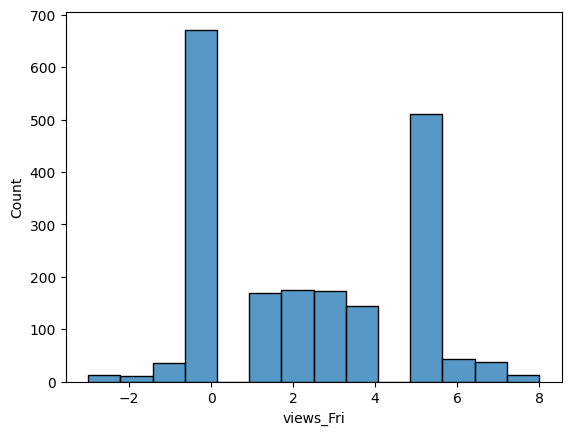

In [682]:
sns.histplot(df['views_Fri'])

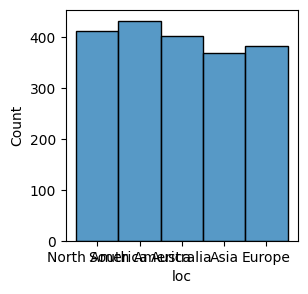

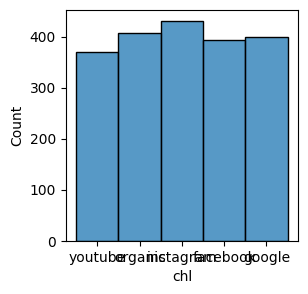

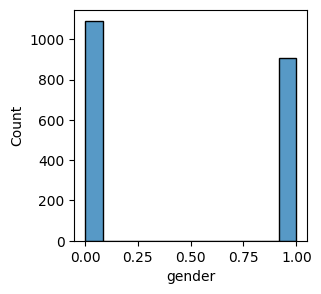

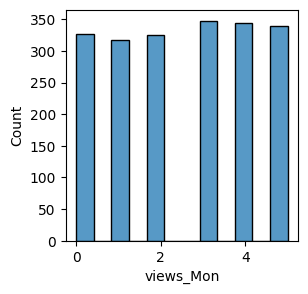

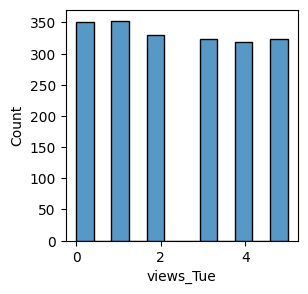

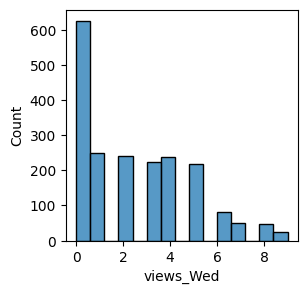

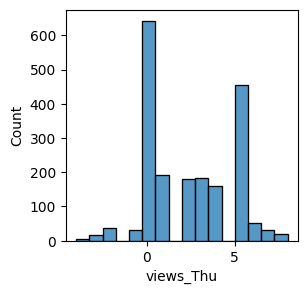

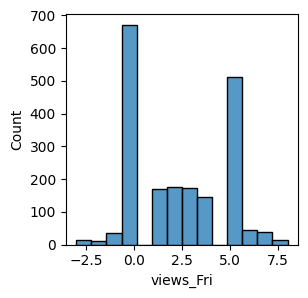

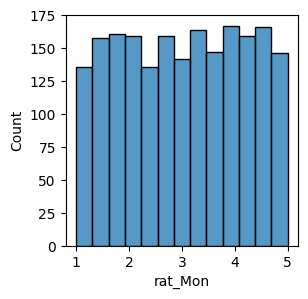

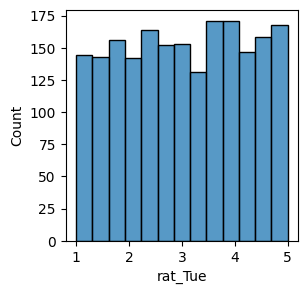

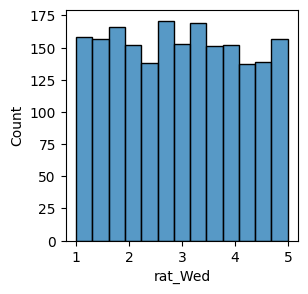

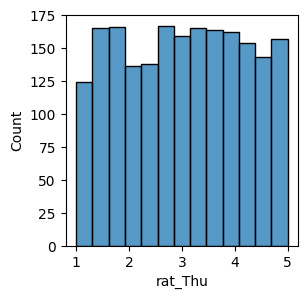

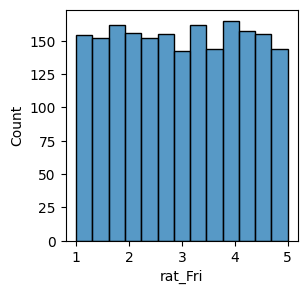

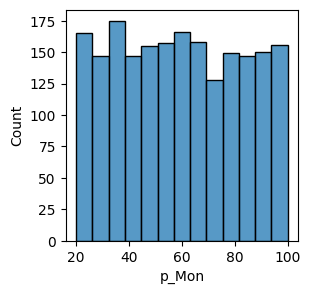

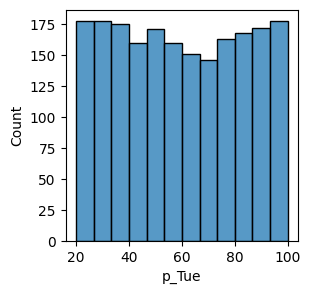

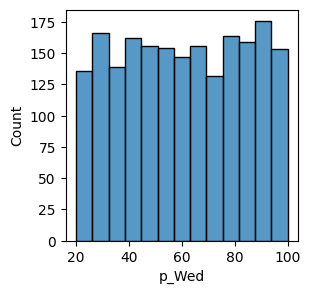

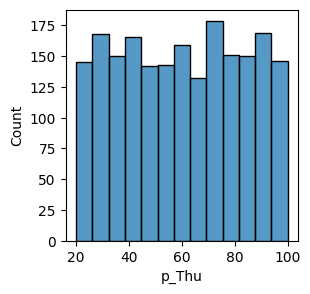

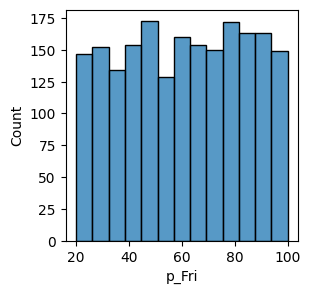

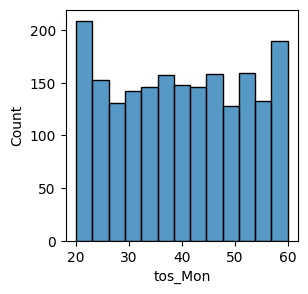

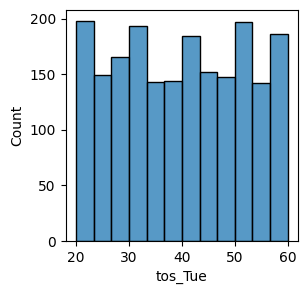

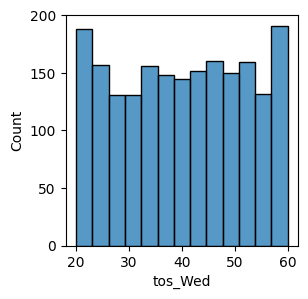

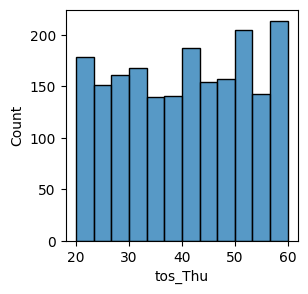

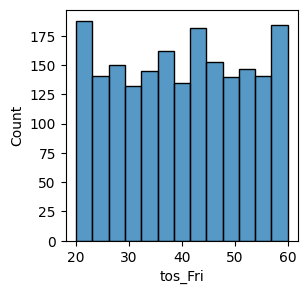

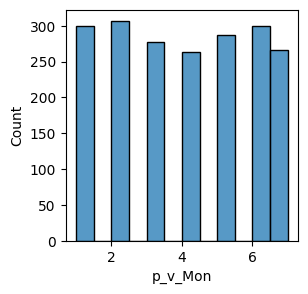

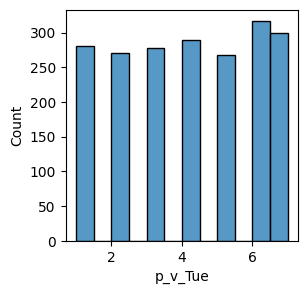

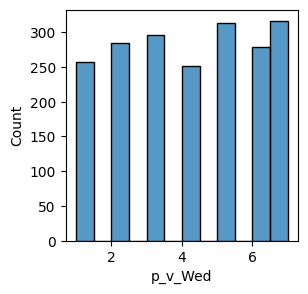

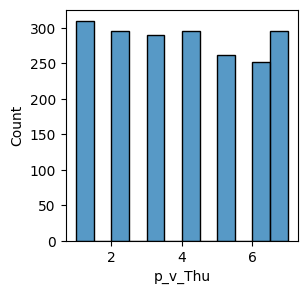

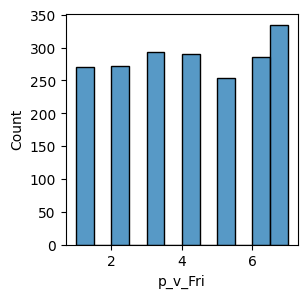

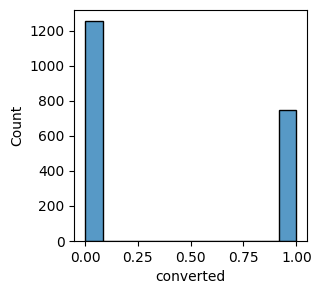

In [683]:
for i in df.columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(df[i])
    plt.show()

almost all the data seam to be normally distributed so can skip MInMaxScalar. hence we can apply standrad scaler since some of the values are high. 

for continuous variables: plot the boxplots with the x-axis as the output variable, and y-axis as the continuous variable 

In [684]:
df.nunique()

loc             5
chl             5
gender          2
views_Mon       6
views_Tue       6
views_Wed      10
views_Thu      13
views_Fri      12
rat_Mon       397
rat_Tue       397
rat_Wed       397
rat_Thu       399
rat_Fri       398
p_Mon        1739
p_Tue        1782
p_Wed        1785
p_Thu        1785
p_Fri        1761
tos_Mon        41
tos_Tue        41
tos_Wed        41
tos_Thu        41
tos_Fri        41
p_v_Mon         7
p_v_Tue         7
p_v_Wed         7
p_v_Thu         7
p_v_Fri         7
converted       2
dtype: int64

In [685]:
df.columns

Index(['loc', 'chl', 'gender', 'views_Mon', 'views_Tue', 'views_Wed',
       'views_Thu', 'views_Fri', 'rat_Mon', 'rat_Tue', 'rat_Wed', 'rat_Thu',
       'rat_Fri', 'p_Mon', 'p_Tue', 'p_Wed', 'p_Thu', 'p_Fri', 'tos_Mon',
       'tos_Tue', 'tos_Wed', 'tos_Thu', 'tos_Fri', 'p_v_Mon', 'p_v_Tue',
       'p_v_Wed', 'p_v_Thu', 'p_v_Fri', 'converted'],
      dtype='object')

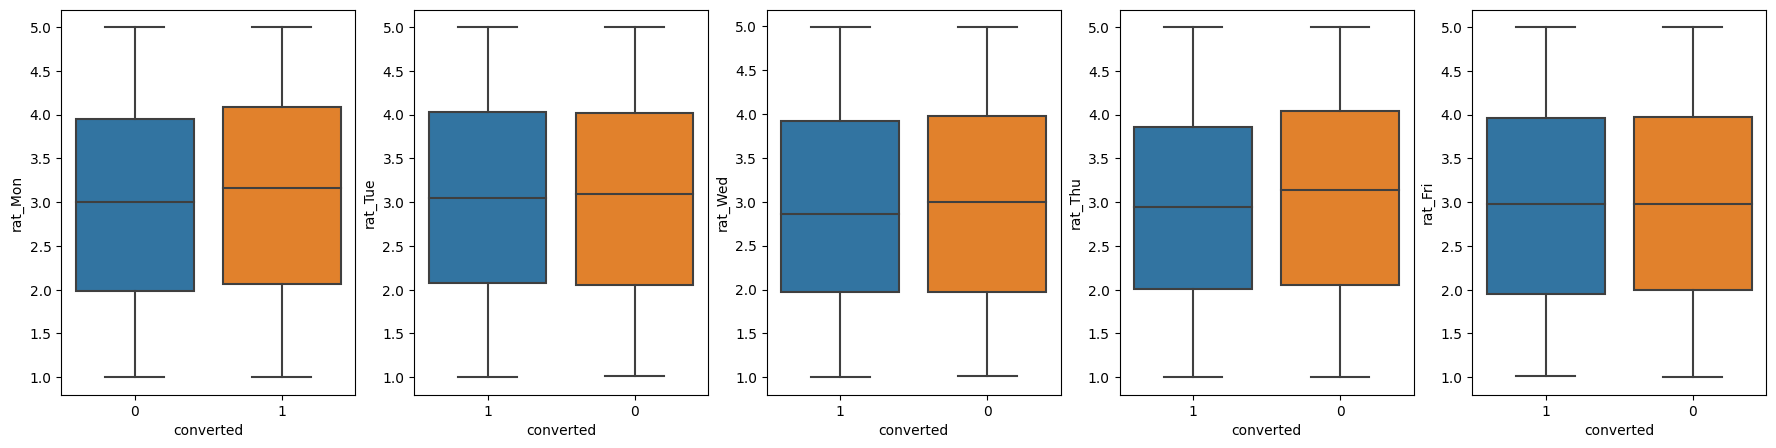

In [686]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(22, 5))
sns.boxplot(x='converted', y='rat_Mon', data=df, order=df.groupby('converted')['rat_Mon'].median().sort_values().index, ax=ax1)
sns.boxplot(x='converted', y='rat_Tue', data=df, order=df.groupby('converted')['rat_Tue'].median().sort_values().index, ax=ax2)
sns.boxplot(x='converted', y='rat_Wed', data=df, order=df.groupby('converted')['rat_Wed'].median().sort_values().index, ax=ax3)
sns.boxplot(x='converted', y='rat_Thu', data=df, order=df.groupby('converted')['rat_Thu'].median().sort_values().index, ax=ax4)
sns.boxplot(x='converted', y='rat_Fri', data=df, order=df.groupby('converted')['rat_Fri'].median().sort_values().index, ax=ax5)
plt.show()

ratings are high forpeople who have converted indicated their rating has an impact on conversion rate

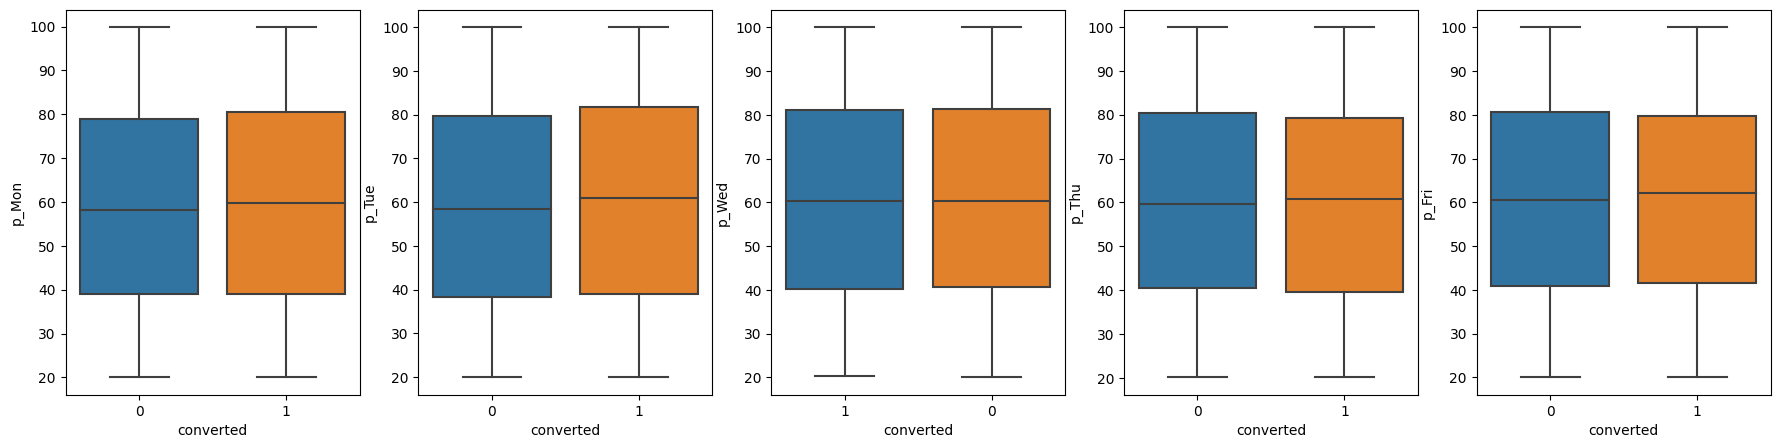

In [687]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(22, 5))
sns.boxplot(x='converted', y='p_Mon', data=df, order=df.groupby('converted')['p_Mon'].median().sort_values().index, ax=ax1)
sns.boxplot(x='converted', y='p_Tue', data=df, order=df.groupby('converted')['p_Tue'].median().sort_values().index, ax=ax2)
sns.boxplot(x='converted', y='p_Wed', data=df, order=df.groupby('converted')['p_Wed'].median().sort_values().index, ax=ax3)
sns.boxplot(x='converted', y='p_Thu', data=df, order=df.groupby('converted')['p_Thu'].median().sort_values().index, ax=ax4)
sns.boxplot(x='converted', y='p_Fri', data=df, order=df.groupby('converted')['p_Fri'].median().sort_values().index, ax=ax5)
plt.show()

mon, tue ,thus, fri seem to have a little correlation. but looks same on wednesday

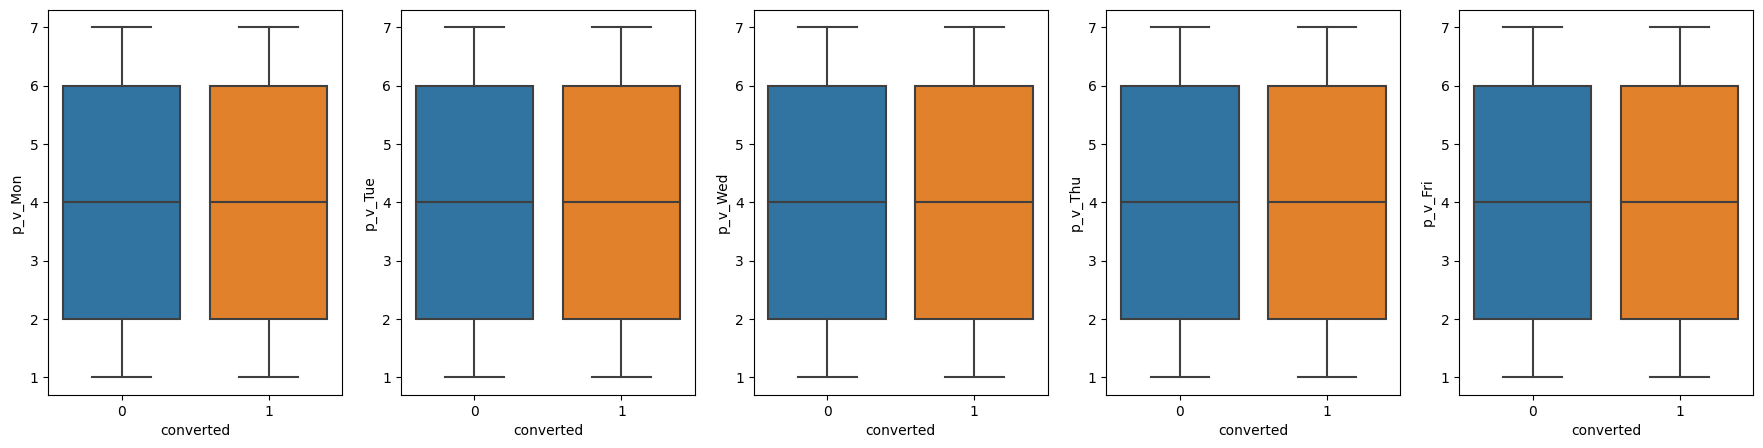

In [688]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(22, 5))
sns.boxplot(x='converted', y='p_v_Mon', data=df, order=df.groupby('converted')['p_v_Mon'].median().sort_values().index, ax=ax1)
sns.boxplot(x='converted', y='p_v_Tue', data=df, order=df.groupby('converted')['p_v_Tue'].median().sort_values().index, ax=ax2)
sns.boxplot(x='converted', y='p_v_Wed', data=df, order=df.groupby('converted')['p_v_Wed'].median().sort_values().index, ax=ax3)
sns.boxplot(x='converted', y='p_v_Thu', data=df, order=df.groupby('converted')['p_v_Thu'].median().sort_values().index, ax=ax4)
sns.boxplot(x='converted', y='p_v_Fri', data=df, order=df.groupby('converted')['p_v_Fri'].median().sort_values().index, ax=ax5)
plt.show()

there is no correlaion with any of the pages visited to our target of being onverted on friday.

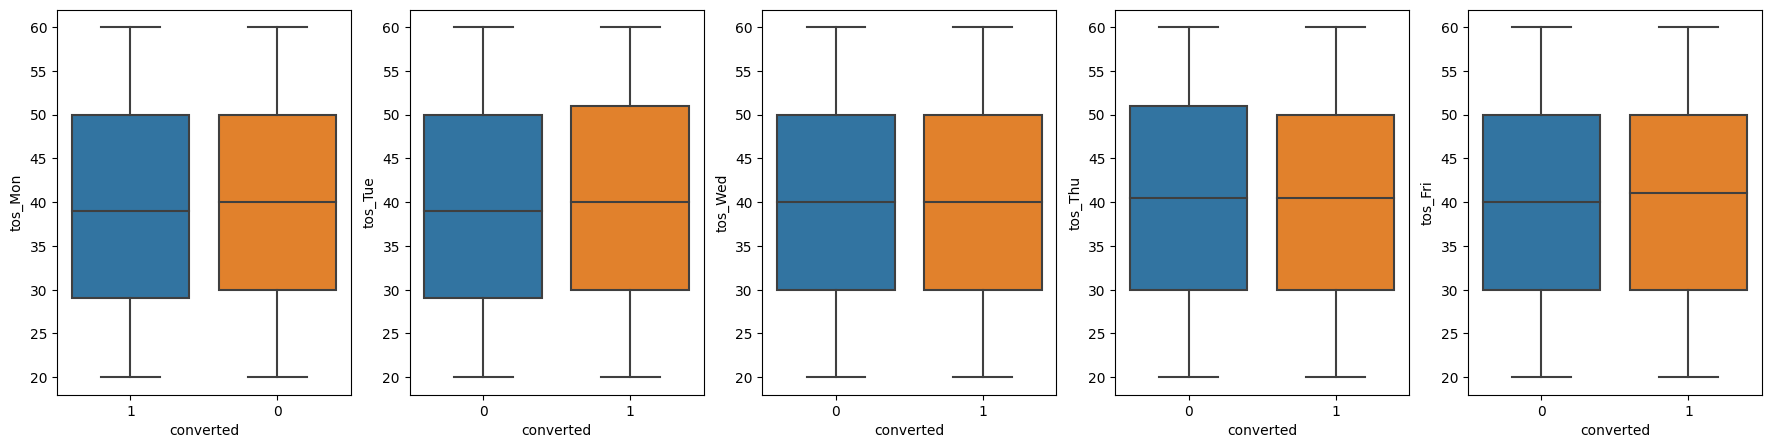

In [689]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(22, 5))
sns.boxplot(x='converted', y='tos_Mon', data=df, order=df.groupby('converted')['tos_Mon'].median().sort_values().index, ax=ax1)
sns.boxplot(x='converted', y='tos_Tue', data=df, order=df.groupby('converted')['tos_Tue'].median().sort_values().index, ax=ax2)
sns.boxplot(x='converted', y='tos_Wed', data=df, order=df.groupby('converted')['tos_Wed'].median().sort_values().index, ax=ax3)
sns.boxplot(x='converted', y='tos_Thu', data=df, order=df.groupby('converted')['tos_Thu'].median().sort_values().index, ax=ax4)
sns.boxplot(x='converted', y='tos_Fri', data=df, order=df.groupby('converted')['tos_Fri'].median().sort_values().index, ax=ax5)
plt.show()

mon, tue, fri - show positive correlation for conversion

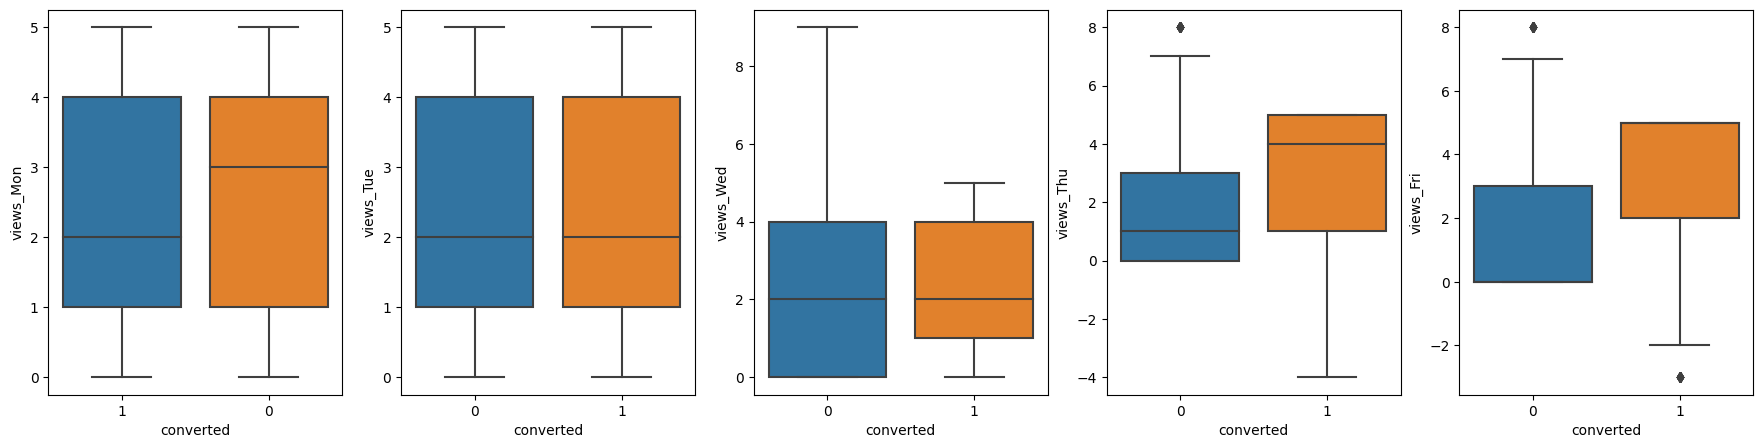

In [690]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(22, 5))
sns.boxplot(x='converted', y='views_Mon', data=df, order=df.groupby('converted')['views_Mon'].median().sort_values().index, ax=ax1)
sns.boxplot(x='converted', y='views_Tue', data=df, order=df.groupby('converted')['views_Tue'].median().sort_values().index, ax=ax2)
sns.boxplot(x='converted', y='views_Wed', data=df, order=df.groupby('converted')['views_Wed'].median().sort_values().index, ax=ax3)
sns.boxplot(x='converted', y='views_Thu', data=df, order=df.groupby('converted')['views_Thu'].median().sort_values().index, ax=ax4)
sns.boxplot(x='converted', y='views_Fri', data=df, order=df.groupby('converted')['views_Fri'].median().sort_values().index, ax=ax5)
plt.show()

Views are very very storngly correlated to conversion and should be considered as primary factor!

feature selection 

catagorical variable : 

In [691]:
df.groupby(['loc', 'converted']).size().unstack() *100/ df.groupby('converted').size()

converted,0,1
loc,,
Asia,18.391720,18.548387
Australia,21.337580,18.145161
Europe,18.710191,19.892473
North America,21.257962,19.489247
South America,20.302548,23.924731


south america has the highest conversion rate. while Australia and NA has the least.

In [692]:
df.groupby(['chl', 'converted']).size().unstack() *100/ df.groupby('converted').size()

converted,0,1
chl,,
facebook,18.949045,20.967742
google,18.630573,22.177419
instagram,20.461783,23.387097
organic,24.761146,12.903226
youtube,17.197452,20.564516


Google and instagram has high influence on the user for conversion.

Google & instagram are not dependent. hence they are independent and have their own influence on conversion. one hot encoding of both location and channel will give better outputs.

one hot encoding 

In [693]:
dummies = pd.get_dummies(df['loc'],dtype=int)
df = pd.concat([df,dummies],axis=1)
df.drop(columns = ['loc'],axis=1,inplace=True)

In [694]:
dummies = pd.get_dummies(df['chl'],dtype=int)
df = pd.concat([df,dummies],axis=1)

df.drop(columns = ['chl'],axis=1,inplace=True)


In [695]:
df.sample(5)

,gender,views_Mon,views_Tue,views_Wed,views_Thu,views_Fri,rat_Mon,rat_Tue,rat_Wed,rat_Thu,...,Asia,Australia,Europe,North America,South America,facebook,google,instagram,organic,youtube
1746,1,0,4,2,5,5,4.72,2.64,4.81,4.06,...,0,0,1,0,0,1,0,0,0,0
41,0,2,0,0,5,3,3.10,3.91,4.62,1.16,...,0,0,0,1,0,0,0,0,0,1
196,0,1,5,0,2,6,2.39,3.10,2.44,4.16,...,0,0,0,1,0,0,1,0,0,0
1705,1,1,1,5,8,2,1.33,1.42,3.29,2.34,...,0,1,0,0,0,0,0,1,0,0
1336,0,0,5,5,0,0,1.39,1.84,4.71,3.89,...,0,1,0,0,0,0,0,0,1,0


PCA is not used and only for reference:

In [696]:
# check with PCA .
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

Cumulative explained variance ratio: [0.04588155 0.08348067 0.12000767 0.15575424 0.19112599 0.22602473
 0.26037938 0.29410024 0.32727203 0.35883237 0.39003395 0.42054924
 0.45093704 0.48055513 0.5093457  0.53802108 0.56630104 0.59434306
 0.62146609 0.64840339 0.67489441 0.70088917 0.72667326 0.75206709
 0.77702694 0.80186418 0.82628937 0.85032163 0.87352655 0.89658575
 0.91921538 0.94162827 0.96377607 0.9854812  1.         1.
 1.        ]


28 number of variables explain the target value by 85%

In [697]:
dc = df.corr()
dc['converted'].sort_values(ascending=False).index

Index(['converted', 'views_Fri', 'views_Thu', 'google', 'South America',
       'youtube', 'tos_Tue', 'rat_Mon', 'instagram', 'tos_Fri', 'p_Tue',
       'views_Tue', 'p_v_Wed', 'facebook', 'p_v_Tue', 'p_Mon', 'Europe',
       'p_v_Thu', 'p_Fri', 'views_Wed', 'p_Wed', 'Asia', 'rat_Tue', 'tos_Wed',
       'p_Thu', 'rat_Fri', 'tos_Thu', 'views_Mon', 'rat_Wed', 'North America',
       'p_v_Fri', 'Australia', 'rat_Thu', 'tos_Mon', 'p_v_Mon', 'organic',
       'gender'],
      dtype='object')

<Axes: >

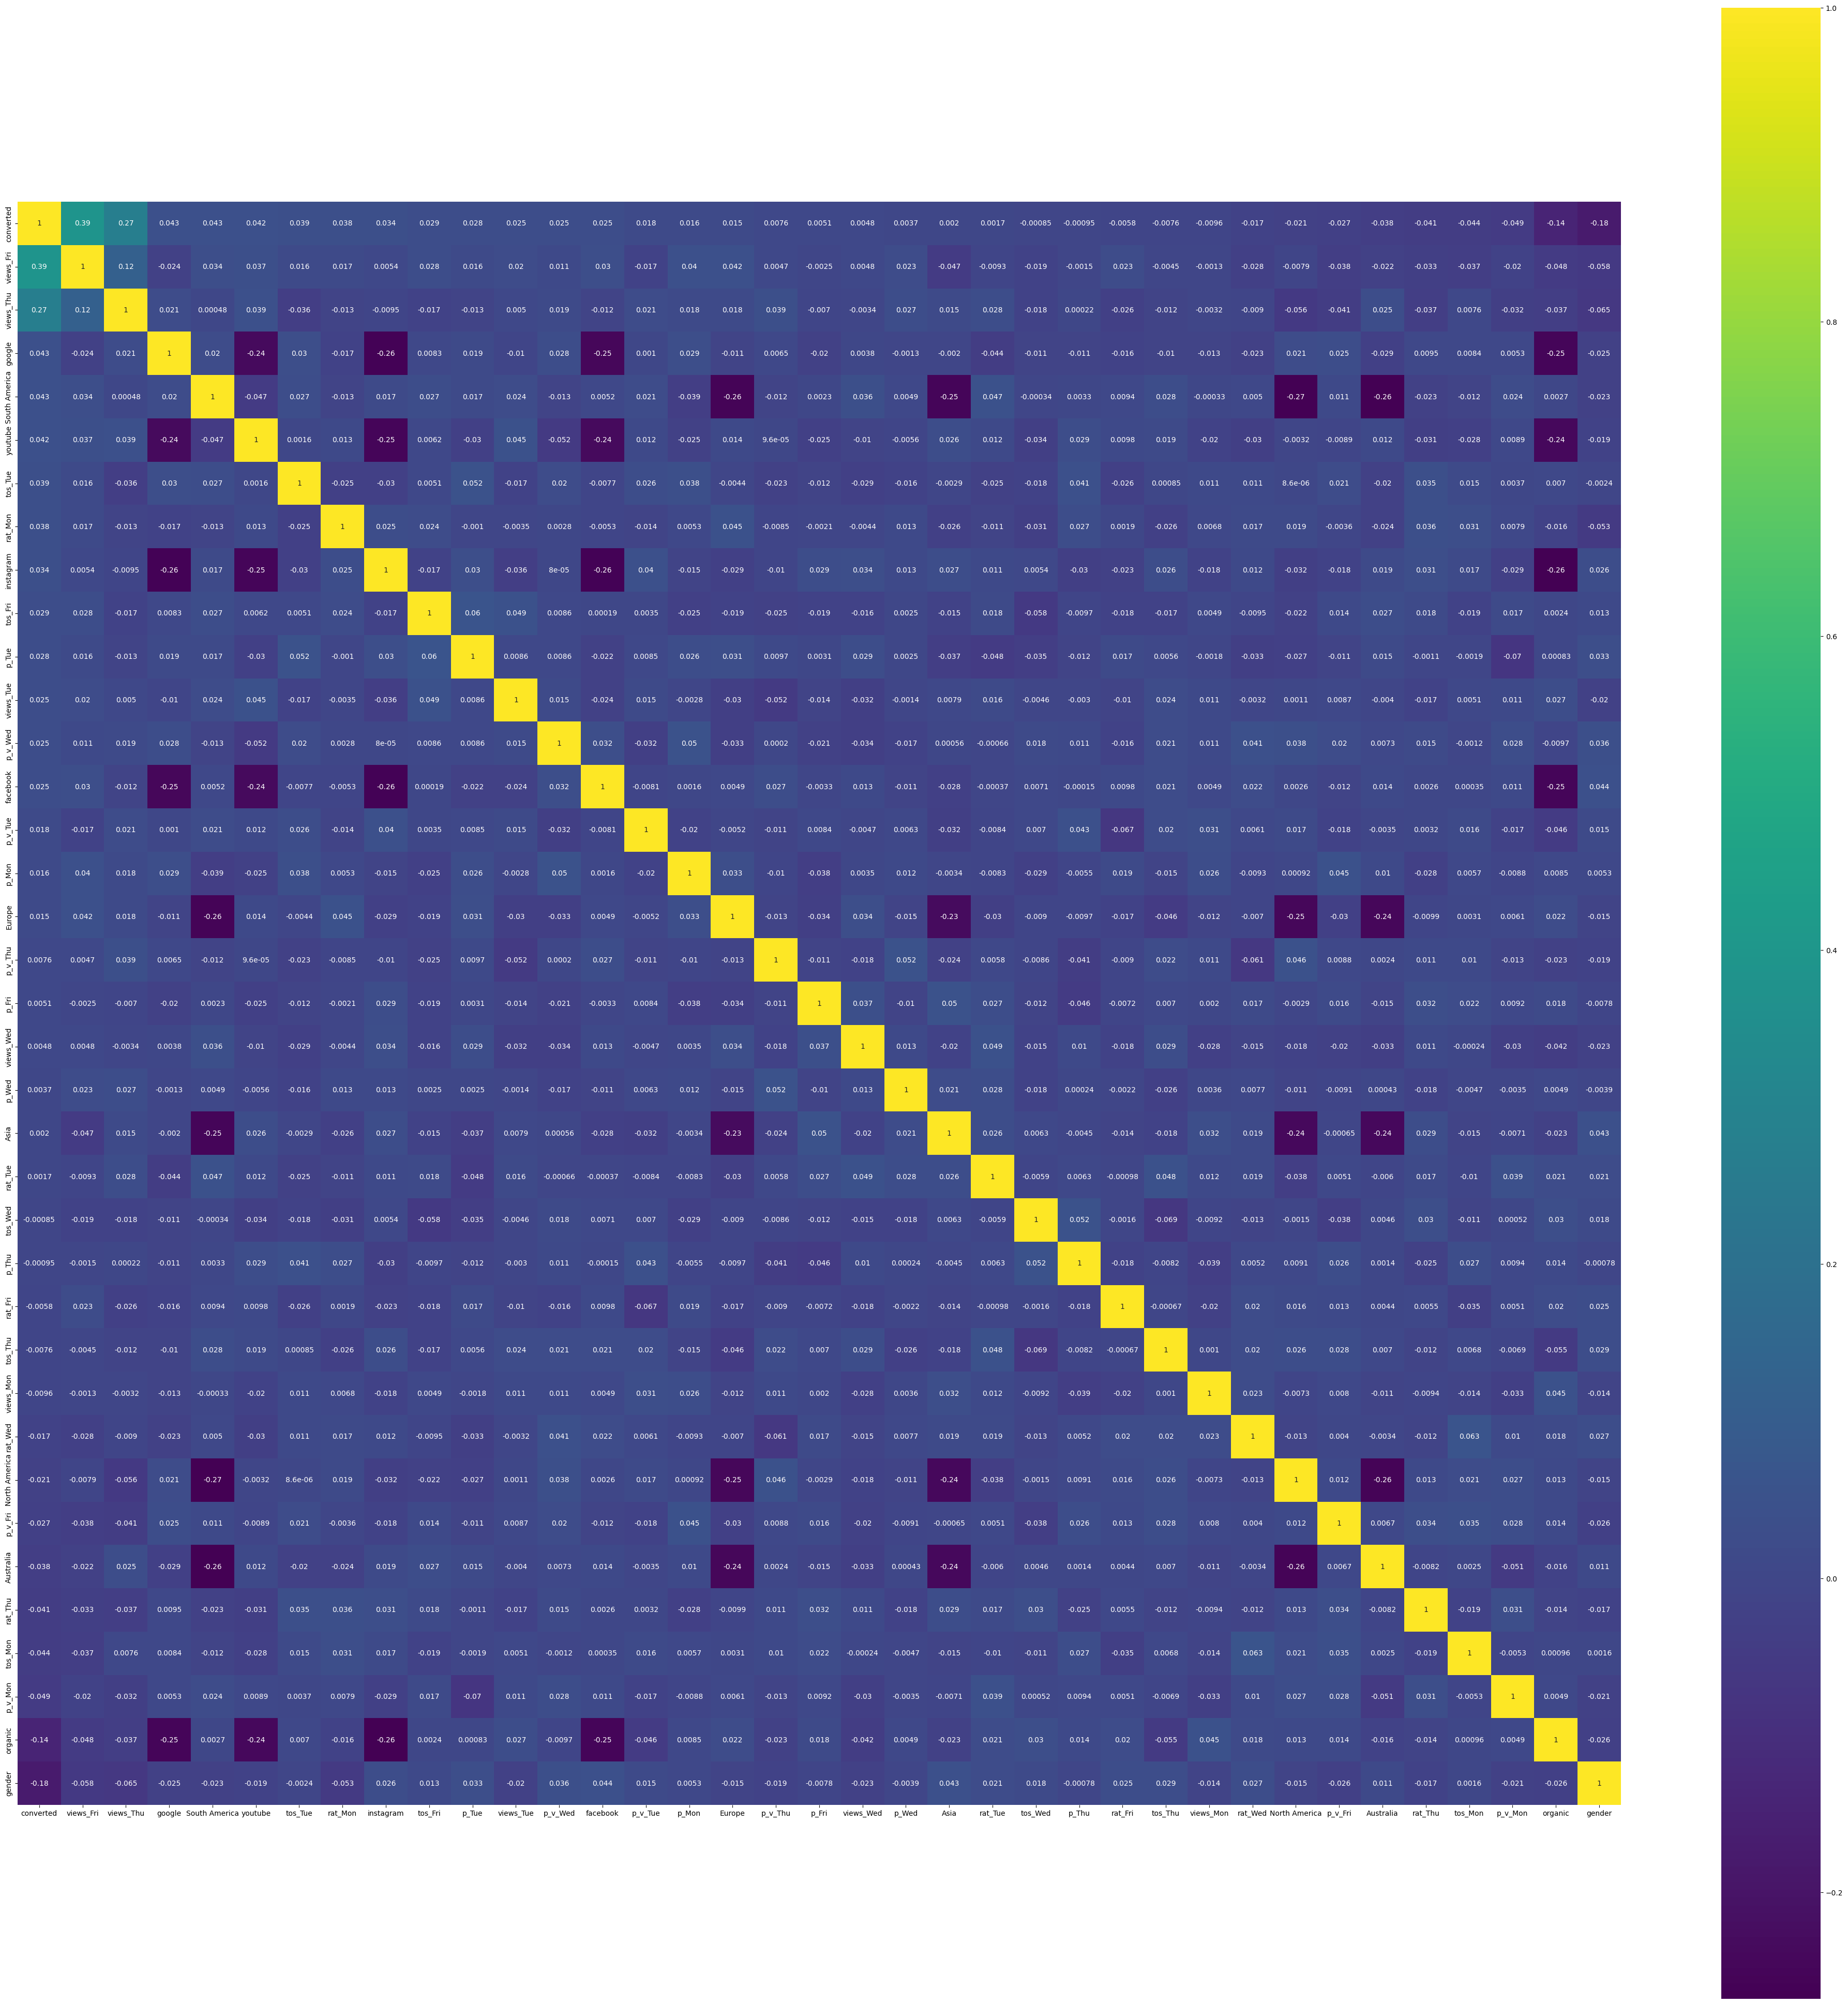

In [698]:
 
df=df[['converted', 'views_Fri', 'views_Thu', 'google', 'South America',
       'youtube', 'tos_Tue', 'rat_Mon', 'instagram', 'tos_Fri', 'p_Tue',
       'views_Tue', 'p_v_Wed', 'facebook', 'p_v_Tue', 'p_Mon', 'Europe',
       'p_v_Thu', 'p_Fri', 'views_Wed', 'p_Wed', 'Asia', 'rat_Tue', 'tos_Wed',
       'p_Thu', 'rat_Fri', 'tos_Thu', 'views_Mon', 'rat_Wed', 'North America',
       'p_v_Fri', 'Australia', 'rat_Thu', 'tos_Mon', 'p_v_Mon', 'organic',
       'gender']]
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(),annot=True,cmap='viridis', square=True)

views on fridat and thusday strongly indicate the conversion on a friday.<br>
one of the reason not to cluster prodcut views as they get disolved with other not informative data.

google,yOutube  and Sounth america seem to provide more correlation with convertion.<br>


In [699]:
dc.drop('converted',axis=1,inplace=True)
dc.drop('converted',axis=0,inplace=True)
dc.replace(1, 0, inplace=True)

In [700]:
row_index, col_index = np.where(dc.values == dc.max().max())
print(dc.index[row_index[0]])
print(dc.columns[col_index[0]])

views_Thu
views_Fri


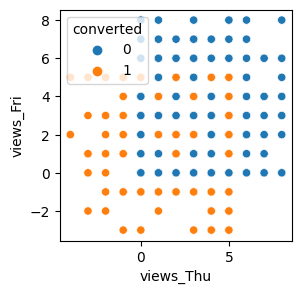

In [701]:
plt.figure(figsize=(3,3))
sns.scatterplot(data=df,x ='views_Thu',y ='views_Fri',hue='converted')
plt.show()

this shows how we can cluster the two of the most influencial feature can be used to predict if a customer will be converted or not.

some of the featueres are well corellared with each other and one of them can be selected to represent the model. so shortenning rate, pages visited, 


define new metrics (e.g., multiply columns together or create custom categories based on multiple variables) 

In [702]:
# the average price of products viewed on all days
df['avg_price'] = df['p_Mon']+df['p_Tue']+df['p_Wed']+df['p_Thu']+df['p_Fri']
df.drop(columns=['p_Mon', 'p_Tue', 'p_Wed', 'p_Thu', 'p_Fri'], inplace=True)
# the average rating of products viewed on all days
df['rating'] = df['rat_Mon']+df['rat_Tue']+df['rat_Wed']+df['rat_Thu']+df['rat_Fri']
df.drop(columns=['rat_Mon', 'rat_Tue', 'rat_Wed', 'rat_Thu', 'rat_Fri'], inplace=True)

# the total time in minutes spent on the website on all days
df['TOS'] = df['tos_Mon']+df['tos_Tue']+df['tos_Wed']+df['tos_Thu']+df['tos_Fri']
df.drop(columns=['tos_Mon', 'tos_Tue', 'tos_Wed', 'tos_Thu', 'tos_Fri'], inplace=True)


In [703]:
df.columns

Index(['converted', 'views_Fri', 'views_Thu', 'google', 'South America',
       'youtube', 'instagram', 'views_Tue', 'p_v_Wed', 'facebook', 'p_v_Tue',
       'Europe', 'p_v_Thu', 'views_Wed', 'Asia', 'views_Mon', 'North America',
       'p_v_Fri', 'Australia', 'p_v_Mon', 'organic', 'gender', 'avg_price',
       'rating', 'TOS'],
      dtype='object')

In [704]:
df.sample(5)

,converted,views_Fri,views_Thu,google,South America,youtube,instagram,views_Tue,p_v_Wed,facebook,...,views_Mon,North America,p_v_Fri,Australia,p_v_Mon,organic,gender,avg_price,rating,TOS
374,1,5,3,0,0,1,0,5,7,0,...,1,1,6,0,4,0,0,372.17,13.35,213
181,0,1,4,0,0,0,0,3,7,1,...,5,1,3,0,2,0,0,284.10,12.68,219
216,1,4,2,0,1,0,1,5,2,0,...,3,0,6,0,2,0,1,287.67,15.12,258
1699,0,5,0,0,1,0,1,4,5,0,...,2,0,7,0,5,0,0,293.09,12.42,188
497,1,3,5,0,0,0,0,4,5,0,...,0,0,7,1,7,1,0,309.56,16.72,217


end o f data preprocessing 

-------------------------------------

setting up the model

In [705]:
df.columns

Index(['converted', 'views_Fri', 'views_Thu', 'google', 'South America',
       'youtube', 'instagram', 'views_Tue', 'p_v_Wed', 'facebook', 'p_v_Tue',
       'Europe', 'p_v_Thu', 'views_Wed', 'Asia', 'views_Mon', 'North America',
       'p_v_Fri', 'Australia', 'p_v_Mon', 'organic', 'gender', 'avg_price',
       'rating', 'TOS'],
      dtype='object')

In [706]:
x=df.drop('converted', axis=1)
y=df['converted']


In [707]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

standardizaton & normalization : 

In [708]:
# Transform the train and test data
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [709]:
x_train.shape

(1400, 24)

In [710]:
x_test.shape

(600, 24)

both have 24 columns each so the shape is good.

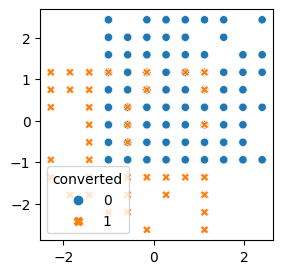

In [711]:
plt.figure(figsize=(3, 3))
sns.scatterplot(x = x_train[:,0],y = x_train[:,1],hue=y_train,style = y_train)
plt.show()
# Slicing  - all rows, first two high correlated feature columns 
# for looking at y - spread. 

the train data shows similar clustering.

-------------------------------------

### modelling 

Build a model to predict the output variable. Hint: you will need to try several models to find the best model for your problem.


Logistic Regression, Naive Bayes, KNN, SVM, Decision Tree. 

In [712]:
# Model Selection
log = LogisticRegression()
#
nb = GaussianNB()
#
knn = KNeighborsClassifier(n_neighbors=7)
#
tree = DecisionTreeClassifier(random_state=123)
#
svc = SVC(kernel='linear', random_state=123,probability=True)
#
models = [log, nb, knn, tree, svc]

In [713]:
warnings.filterwarnings("ignore")

model training

In [714]:
log.fit(x_train,y_train)
nb.fit(x_train,y_train)
knn.fit(x_train,y_train)
tree.fit(x_train,y_train)
svc.fit(x_train,y_train)

SVC(kernel='linear', probability=True, random_state=123)

Cross validation 

In [715]:
cv_scores = cross_val_score(log, x_train, y_train, cv=10)
print(cv_scores)
print(cv_scores.mean())


[0.74285714 0.72142857 0.73571429 0.77857143 0.7        0.72857143
 0.81428571 0.72857143 0.73571429 0.75714286]
0.7442857142857142


mean is 0.7442

In [716]:
cv_scores = cross_val_score(nb, x_train, y_train, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.69285714 0.77857143 0.75714286 0.76428571 0.7        0.75
 0.83571429 0.74285714 0.75714286 0.75      ]
0.7528571428571429


mean is 0.75. better than Logistic regression

In [717]:
cv_scores = cross_val_score(knn, x_train, y_train, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.65714286 0.76428571 0.7        0.66428571 0.67857143 0.67857143
 0.66428571 0.68571429 0.65714286 0.73571429]
0.6885714285714286


mean is 0.688. not a good model.

In [718]:
cv_scores = cross_val_score(tree,  x_train, y_train, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.84285714 0.79285714 0.91428571 0.88571429 0.77857143 0.82142857
 0.81428571 0.86428571 0.85       0.84285714]
0.8407142857142856


this has the highest cross validaiton mean. 

In [719]:
cv_scores = cross_val_score(svc, x_train, y_train, cv=10)
print(cv_scores)
print(cv_scores.mean())

[0.75714286 0.77142857 0.72857143 0.77857143 0.7        0.72142857
 0.81428571 0.74285714 0.76428571 0.75      ]
0.7528571428571429


mean is 0.75. better than Logistic regression but same as naive bayes

In [720]:
yhat_log = log.predict_proba(x_test)
yhat_nb = nb.predict_proba(x_test)
yhat_knn = knn.predict_proba(x_test)
yhat_tree = tree.predict_proba(x_test)
yhat_svc = svc.predict_proba(x_test)

In [721]:
y_pred_log = log.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_tree = tree.predict(x_test)
y_pred_svc = svc.predict(x_test)

In [722]:
fpr_log, tpr_log, thresholds_l = roc_curve(y_test, yhat_log[:,1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, yhat_nb[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, yhat_nb[:,1]) # * check again
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, yhat_tree[:,1])
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, yhat_svc[:,1])

In [723]:

print(confusion_matrix(y_pred=y_pred_log,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_log))

[[329  67]
 [ 79 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       396
           1       0.65      0.61      0.63       204

    accuracy                           0.76       600
   macro avg       0.73      0.72      0.72       600
weighted avg       0.75      0.76      0.75       600



In [724]:

print(confusion_matrix(y_pred=y_pred_nb,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_nb))

[[315  81]
 [ 70 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       396
           1       0.62      0.66      0.64       204

    accuracy                           0.75       600
   macro avg       0.72      0.73      0.72       600
weighted avg       0.75      0.75      0.75       600



In [725]:

print(confusion_matrix(y_pred=y_pred_knn,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_knn))
# order of detail inputed is important. Since predictied and actual order can interchange the values of FP & FN.

[[306  90]
 [100 104]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       396
           1       0.54      0.51      0.52       204

    accuracy                           0.68       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.68      0.68      0.68       600



In [726]:

print(confusion_matrix(y_pred=y_pred_tree,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_tree))

[[330  66]
 [ 31 173]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       396
           1       0.72      0.85      0.78       204

    accuracy                           0.84       600
   macro avg       0.82      0.84      0.83       600
weighted avg       0.85      0.84      0.84       600



In [727]:

print(confusion_matrix(y_pred=y_pred_svc,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_svc))

[[321  75]
 [ 72 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       396
           1       0.64      0.65      0.64       204

    accuracy                           0.76       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.76      0.76      0.76       600



Evaluate each model using the evaluation techniques you have learned in class.


[Text(0.595407196969697, 0.9722222222222222, 'views_Fri <= 0.908\ngini = 0.474\nsamples = 1400\nvalue = [860, 540]\nclass = 0'),
 Text(0.296875, 0.9166666666666666, 'views_Fri <= -1.217\ngini = 0.352\nsamples = 964\nvalue = [744, 220]\nclass = 0'),
 Text(0.28929924242424243, 0.8611111111111112, 'gini = 0.0\nsamples = 41\nvalue = [0, 41]\nclass = 1'),
 Text(0.30445075757575757, 0.8611111111111112, 'views_Fri <= -0.792\ngini = 0.313\nsamples = 923\nvalue = [744, 179]\nclass = 0'),
 Text(0.09564393939393939, 0.8055555555555556, 'views_Thu <= -1.577\ngini = 0.097\nsamples = 470\nvalue = [446, 24]\nclass = 0'),
 Text(0.08806818181818182, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.10321969696969698, 0.75, 'views_Thu <= 0.535\ngini = 0.09\nsamples = 468\nvalue = [446, 22]\nclass = 0'),
 Text(0.03598484848484849, 0.6944444444444444, 'rating <= -2.208\ngini = 0.032\nsamples = 368\nvalue = [362, 6]\nclass = 0'),
 Text(0.015151515151515152, 0.6388888888888888, 'facebook 

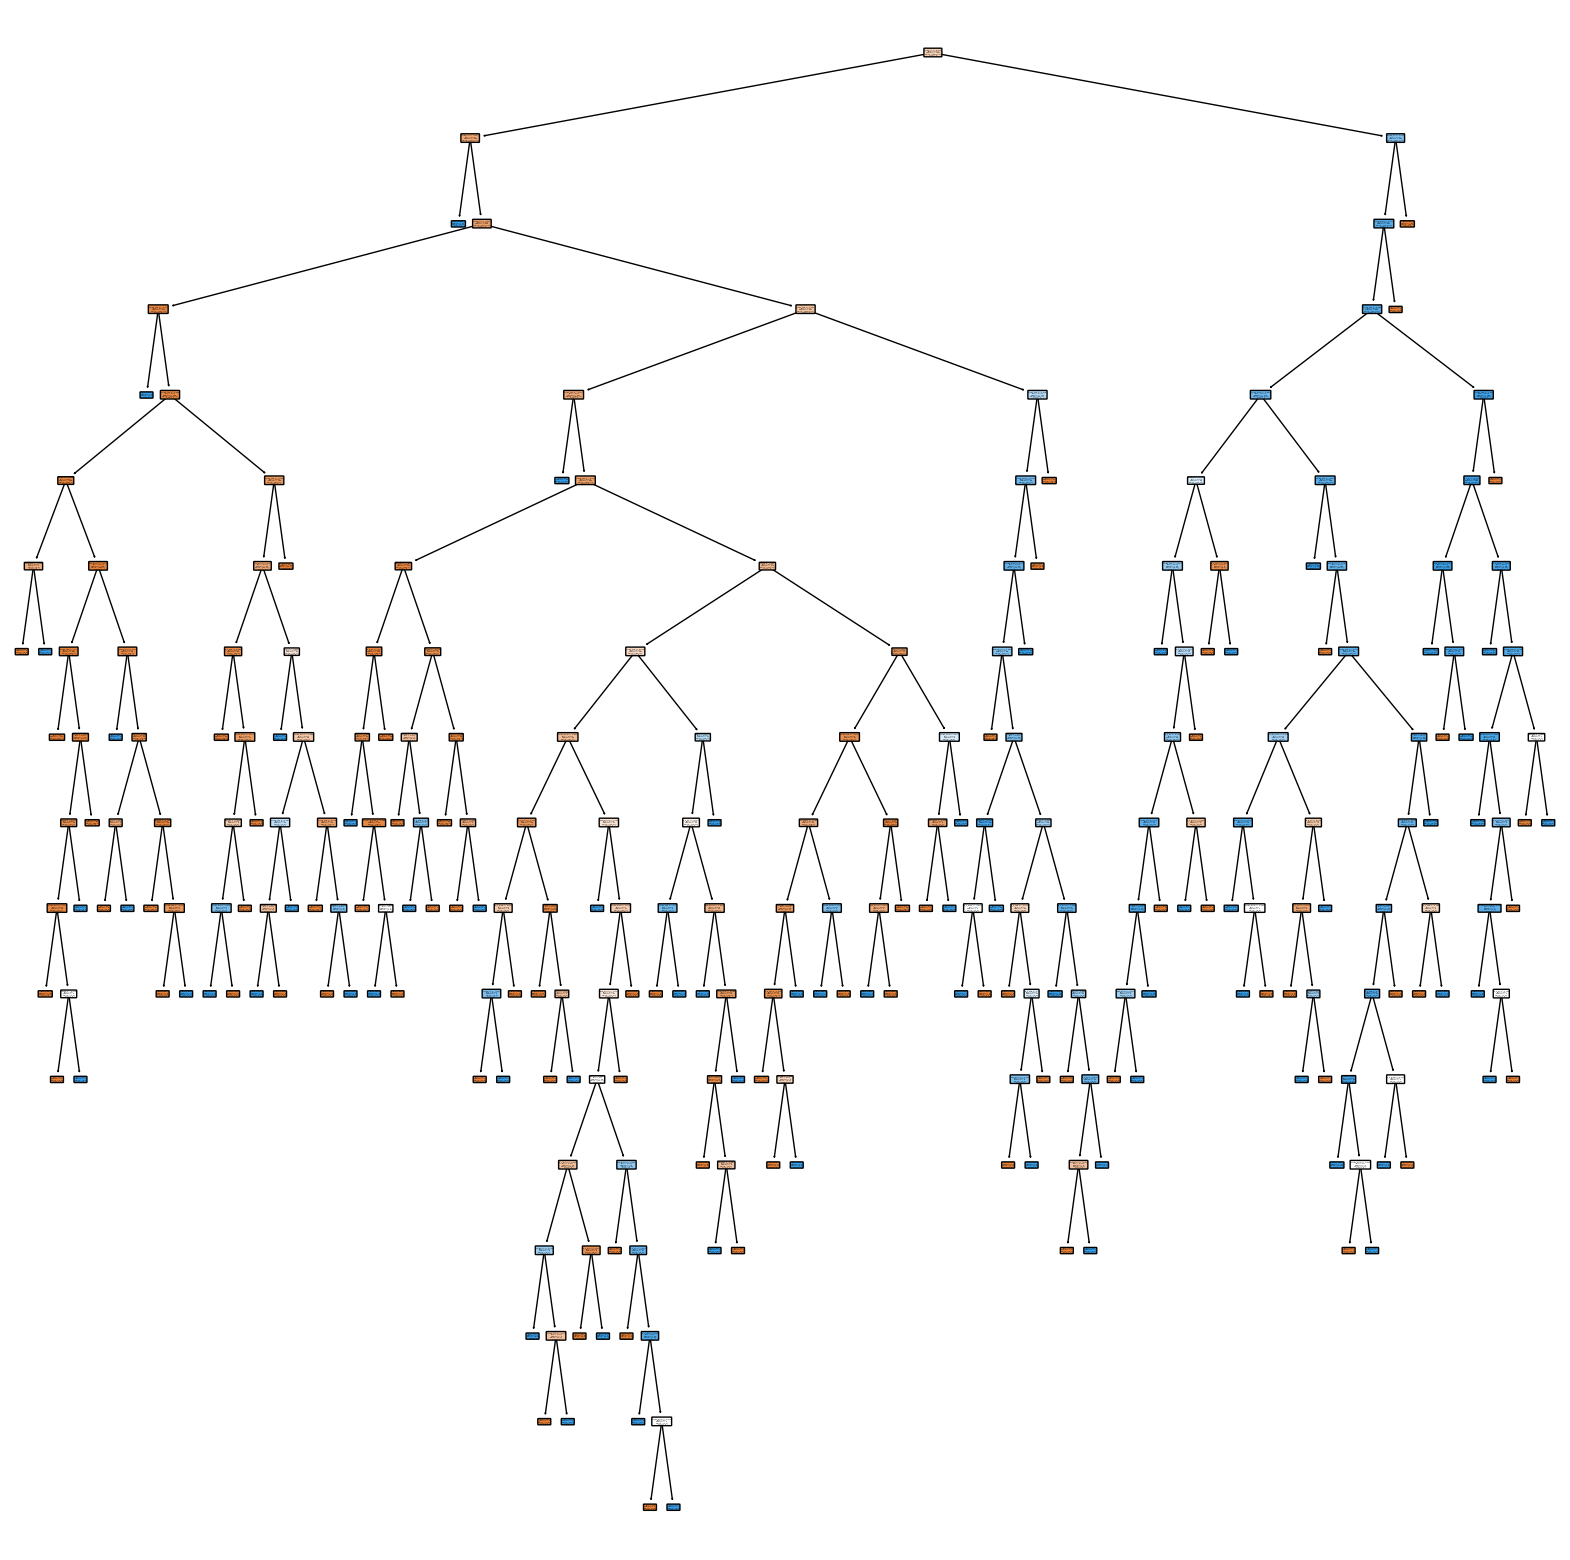

In [728]:
# plotting decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
feature_names = x.columns.tolist() 
plot_tree(tree, filled=True, rounded=True, feature_names=feature_names, class_names=['0', '1'])


some of the features have been adjusted based on decision tree outputs.

we need high precision in out case to predict the best conversion. 
hence the most surable model is Decision tree.<br>
reference image : 

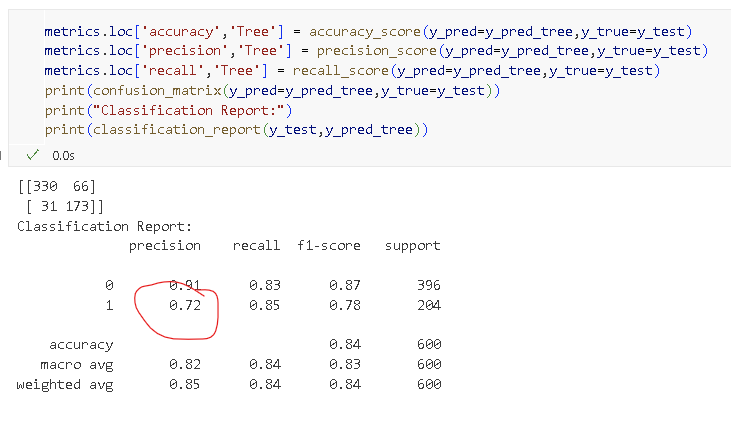

Also the cross validation score suggests a goo fit.

ROC curve overlap

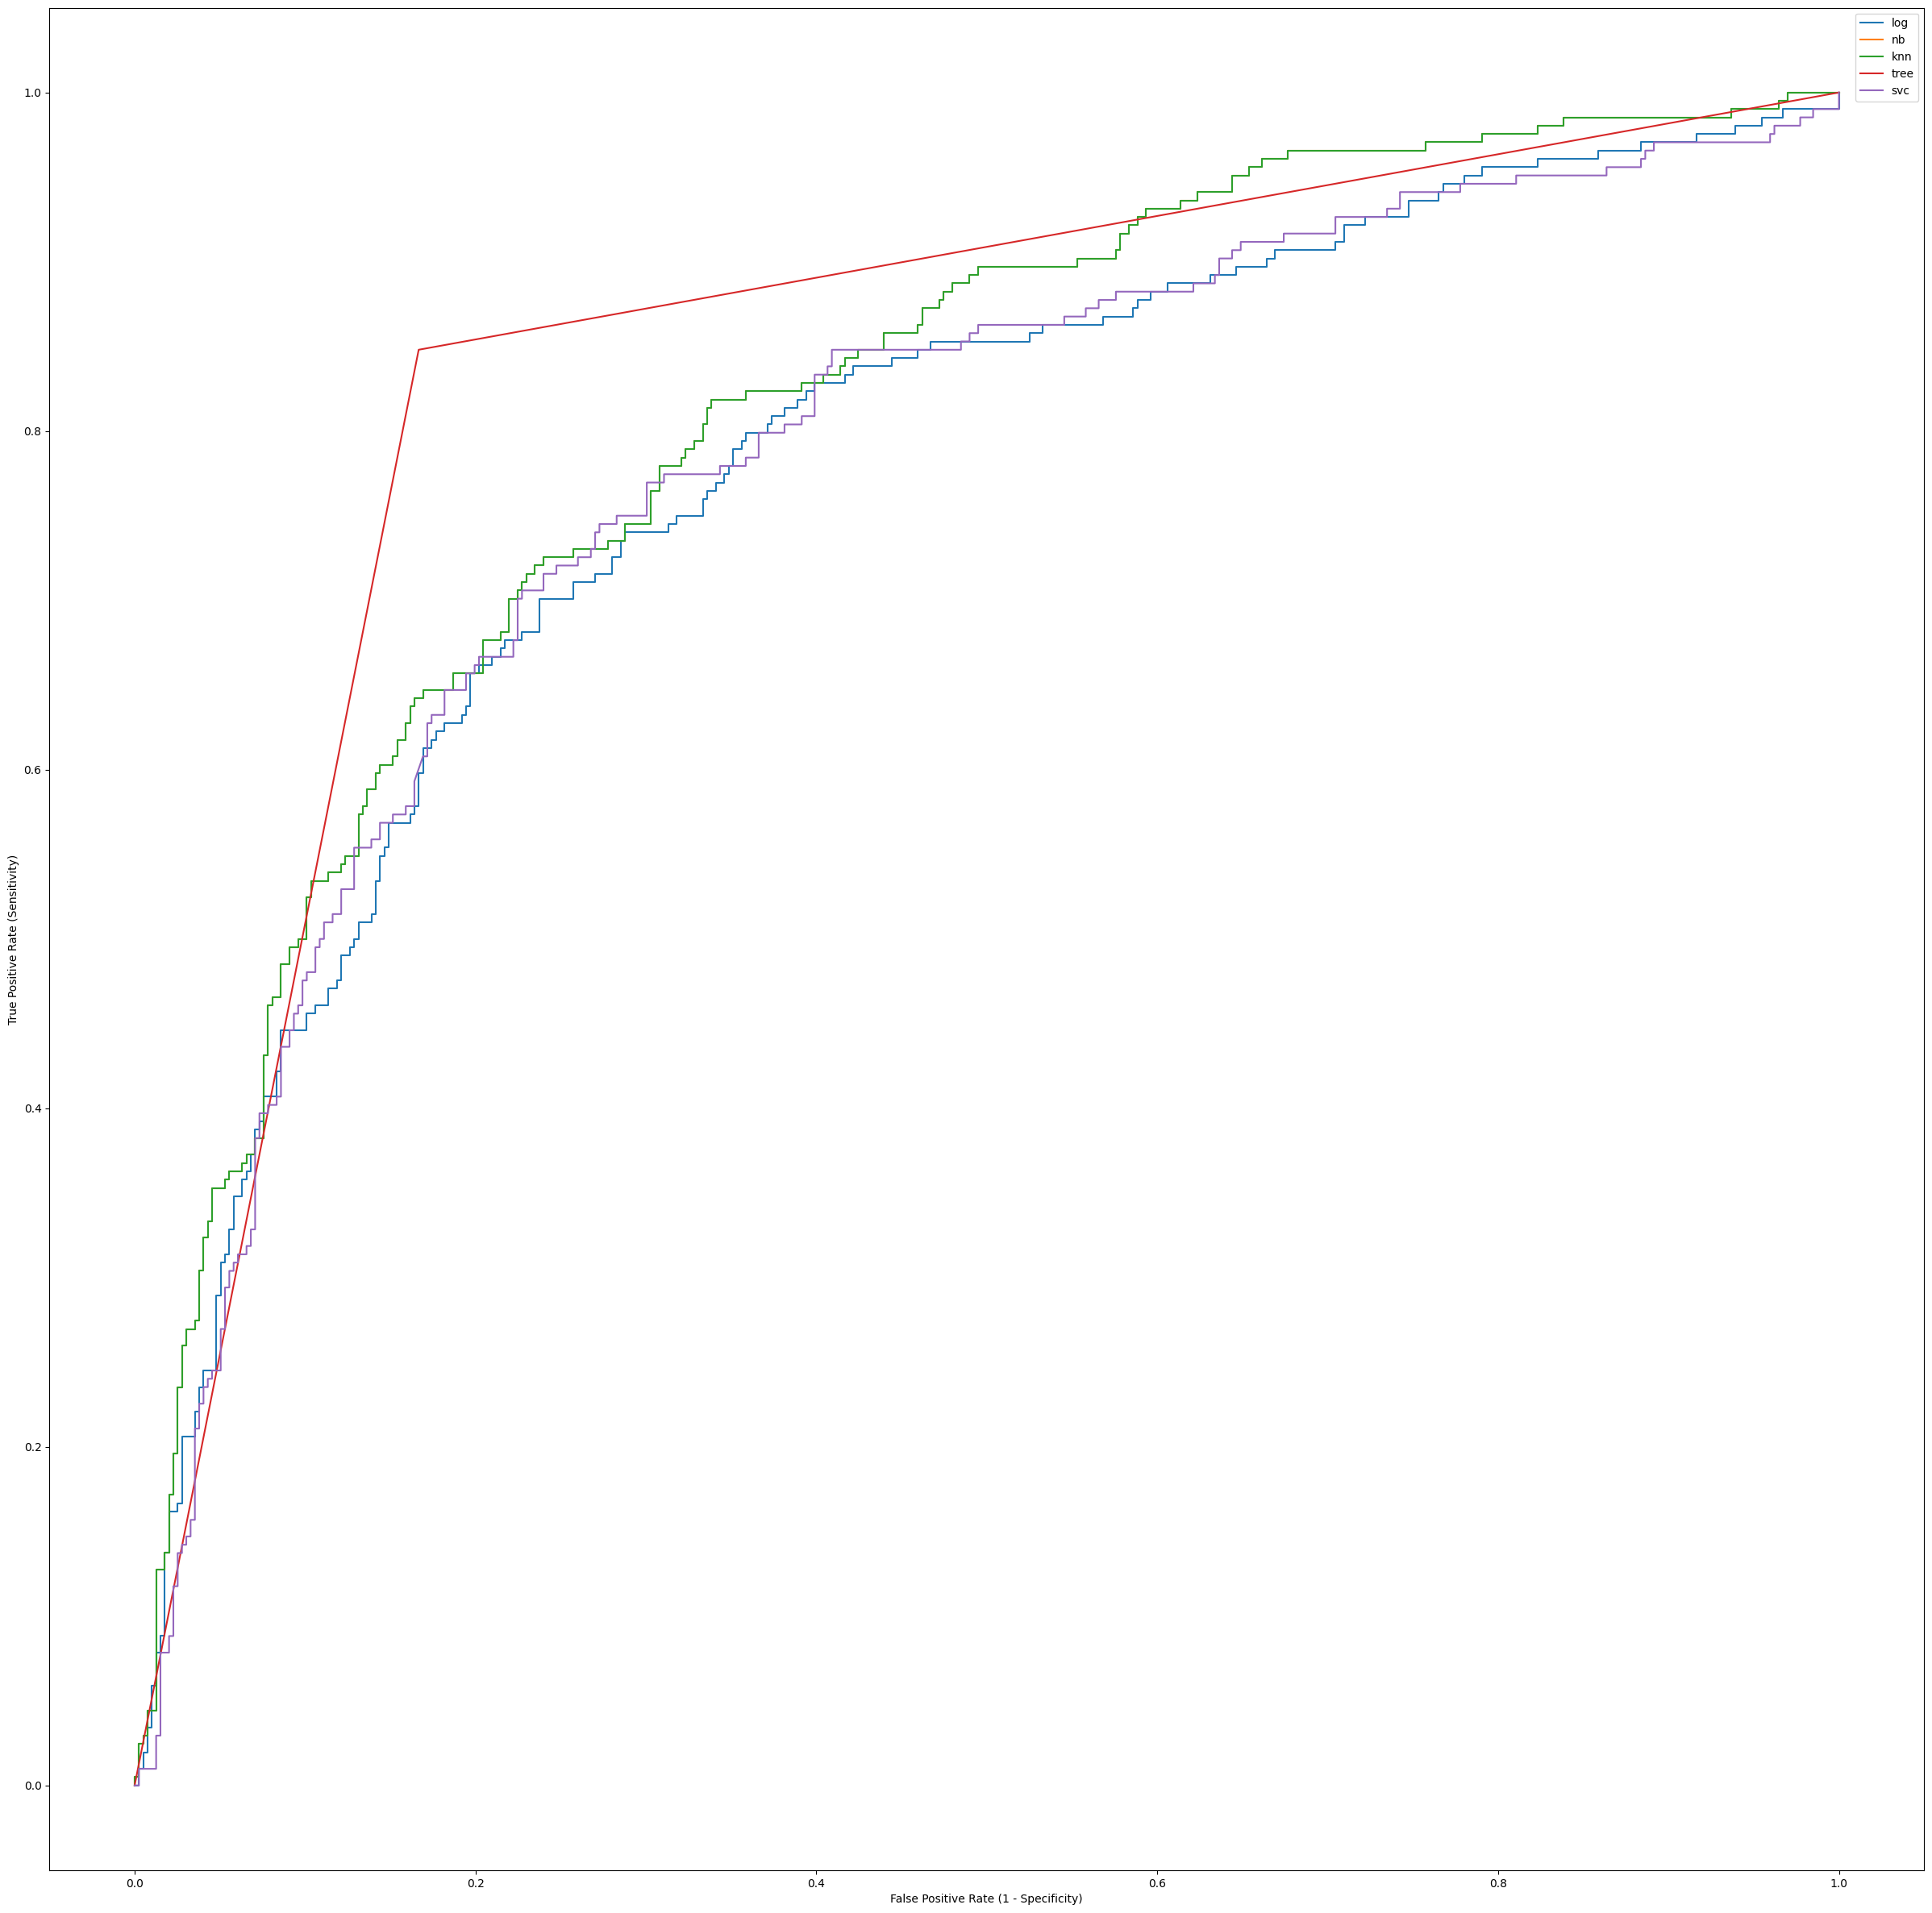

In [729]:
plt.figure(figsize=(30, 30))
plt.plot(fpr_log,tpr_log, label='log')
plt.plot(fpr_nb,tpr_nb, label='nb')
plt.plot(fpr_knn,tpr_knn, label='knn')
plt.plot(fpr_tree,tpr_tree, label='tree')
plt.plot(fpr_svc,tpr_svc, label='svc')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()

In [730]:
# auc scores
print('logistic_regression : ',auc(fpr_log,tpr_log))
print('NaiveBayes : ',auc(fpr_nb,tpr_nb))
print('KNN : ',auc(fpr_knn,tpr_knn))
print('Tree : ',auc(fpr_tree,tpr_tree))
print('Svc : ',auc(fpr_svc,tpr_svc))

logistic_regression :  0.7779263220439692
NaiveBayes :  0.8087740146563676
KNN :  0.8087740146563676
Tree :  0.8406862745098039
Svc :  0.7806248762131114


 AUc of the model is good, we use this model based on the business proposed.<br>
 Decision tree is best for this requirment. Doing hyper parameter tuning based off it.<br>

In [731]:
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
randomsearch = RandomizedSearchCV(model, param_grid, cv=10, n_iter=300, scoring='accuracy')

grid_search.fit(x_train, y_train)
randomsearch.fit(x_train, y_train)
print("Best Hyperparameters grid:", grid_search.best_params_)
print("Best Hyperparameters Random:", randomsearch.best_params_)

Best Hyperparameters grid: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Hyperparameters Random: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}


from both considering random: <br>
{'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}<br>

applying the best Hyperparameters:Modle optimization

In [732]:
best_model = DecisionTreeClassifier(**randomsearch.best_params_)
cv_scores = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')
best_model.fit(x_train, y_train)
# Predict
y_hat_best = best_model.predict_proba(x_test)
y_pred_best = best_model.predict(x_test)

* Checking performance metrics: precision, recall, F1 score, roc_auc, accuracy score 

In [733]:
print(confusion_matrix(y_pred=y_pred_best, y_true=y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

[[345  51]
 [ 30 174]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       396
           1       0.77      0.85      0.81       204

    accuracy                           0.86       600
   macro avg       0.85      0.86      0.85       600
weighted avg       0.87      0.86      0.87       600



it has improved from 0.72 to 0.77 for precision over converted as '1'

7. Explaining the results :


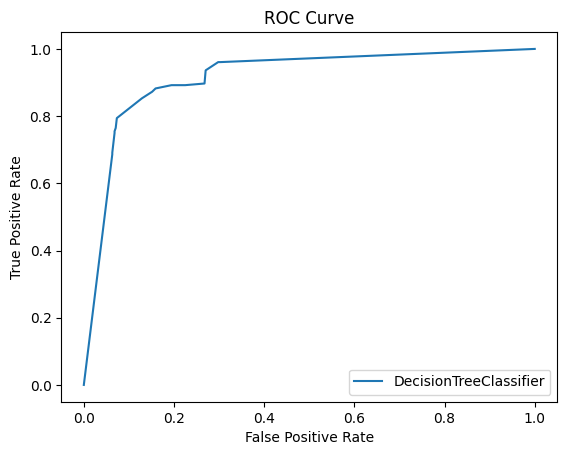

In [734]:
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, label=best_model.__class__.__name__)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

---------------------------------------------------------------

## The Main Question<br>
### what are the characteristics of users who convert (behavioural and demographic)? Your data exploration findings, initial hypothesis ? <br>
Based on EDA we can understand the following <br>
1. Average rating has low impact on conversion while product view has the highest impact<br>
2. Page view has absolutely no impact.<br>
3. south America has the highest conversion rate. while Australia and NA has the least. <br>
4. Google and Instagram has high influence on the user for conversion. <br>
<br>
###  whether the hypothesis proved true.<br>

Based on decision tree we can see that the very first split is based on product views on Friday & thusday which is similar to our theory in EDA analysis. <br>
Although Facebook & avg pricing is also important as a third & fourth split which is been  predicted by the model. <br>
<br>
### The final model you selected and how you know this is the best model for the problem.<br>
Based on our business proposal we need to have a high precision to recommend based of precision values which is a key to have less false positives rate. <br>

### How the model should be used by the business, in business process. <br>
This model can be used to predict the possibility of a conversion on a Friday. It helps in identifying the key parameters required based on which this event can happen. And this is based on 28 different variables. But to simplify we can consider the top two variables of product views on Thursday and Friday as a leading. <br>
The model can also suggest areas that are required to be focused to improve conversions. <br>
We can identify the threshold of the model to improve sensitivity of the model. Or use SMOTE to balance the dataset to improve predicitons. <br>



---------------------------------------------------------------